In [1]:
import pandas as pd
# %matplotlib inline

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/fighter-clean.csv", index_col=0)
print(df)

     First Name   Last Name      Nickname  Height  Weight  Reach    Stance  \
0           Tom       Aaron           NaN     NaN    70.3    NaN       NaN   
1         Danny      Abbadi  The Assassin   180.0    70.3    NaN  Orthodox   
2       Nariman     Abbasov     Bayraktar   172.0    70.3  167.0  Orthodox   
3         David      Abbott          Tank   182.0   120.2    NaN    Switch   
4         Hamdy  Abdelwahab    The Hammer   187.0   119.7  182.0  Southpaw   
...         ...         ...           ...     ...     ...    ...       ...   
4035       Dave    Zitanick           NaN     NaN    77.1    NaN       NaN   
4036       Alex      Zuniga           NaN     NaN    65.8    NaN       NaN   
4037     George      Zuniga           NaN   175.0    83.9    NaN       NaN   
4038      Allan      Zuniga         Tigre   170.0    70.3  177.0  Orthodox   
4039     Virgil     Zwicker        RezDog   187.0    93.0  187.0       NaN   

      Wins  Losses  Draws  
0        5       3      0  
1      

Let's visualize our data

Minimum:47.60
Mean:77.40
Median:77.10
Mode:70.30
Maximum:195.00



/tmp/ipykernel_507328/2516849328.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


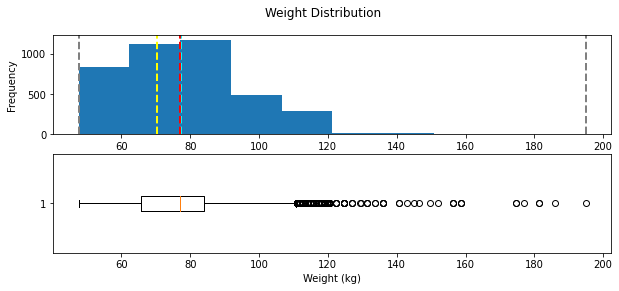

In [3]:
def show_distribution(var_data, value="Value", title="Data Distribution"):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel(value)

    fig.suptitle(title)

    # Show the figure
    fig.show()

col = df['Weight']
show_distribution(col, value="Weight (kg)", title="Weight Distribution")

Minimum:152.00
Mean:177.75
Median:177.00
Mode:182.00
Maximum:226.00



/tmp/ipykernel_507328/2516849328.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


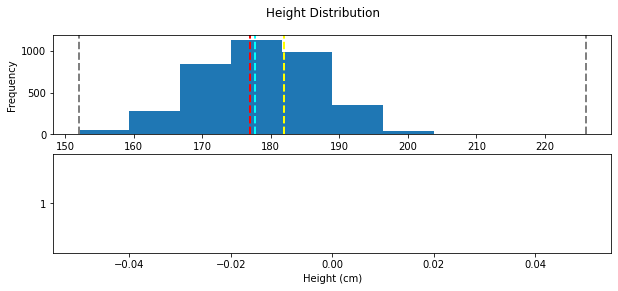

In [4]:
col = df['Height']
show_distribution(col, value="Height (cm)", title="Height Distribution")

Minimum:147.00
Mean:181.37
Median:182.00
Mode:182.00
Maximum:213.00



/tmp/ipykernel_507328/2516849328.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


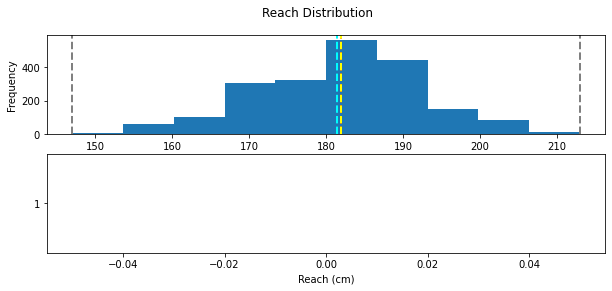

In [5]:
col = df['Reach']
show_distribution(col, value="Reach (cm)", title="Reach Distribution")

/home/mike/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Weight vs Height'}, xlabel='Weight', ylabel='Height'>

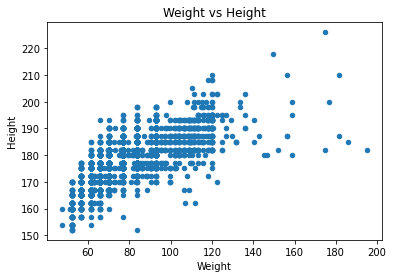

In [6]:
df.plot.scatter(title='Weight vs Height', x='Weight', y='Height')

array([<Axes: ylabel='Last Name'>], dtype=object)

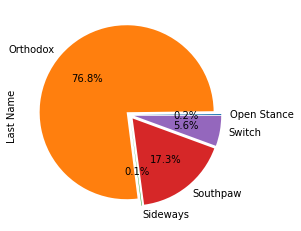

In [7]:
df.groupby(['Stance']).count()['Last Name'].plot(
    kind='pie', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05), subplots=True)

In [8]:
# Average Win/Loss ratio by stances
df['Wins'].mean()/df['Losses'].mean()
stance_group = df.groupby(['Stance'])

stance_group.apply(
         lambda x: x['Wins'].mean()/x['Losses'].mean())

Stance
Open Stance    1.582090
Orthodox       2.219723
Sideways       1.200000
Southpaw       2.302779
Switch         2.656992
dtype: float64